# Princpled Bayesian Workflow

Example from https://betanalpha.github.io/assets/case_studies/principled_bayesian_workflow.html#5_close_enough_for_an_effective_demonstration with help from code at https://github.com/lstmemery/principled-bayesian-workflow-pymc3

In [18]:
import pymc3 as pm
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import theano.tensor as T
import theano
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.style.use(['seaborn-talk'])
plt.rcParams["figure.figsize"] = (10,8)
%matplotlib inline

In [2]:
c_light ="#DCBCBC"
c_light_highlight ="#C79999"
c_mid ="#B97C7C"
c_mid_highlight ="#A25050"
c_dark ="#8F2727"
c_dark_highlight ="#7C0000"

# Section 5
## 5.1

In [53]:
n_sensors = 1000
n_samples = 1000
prior_sd = 6.44787

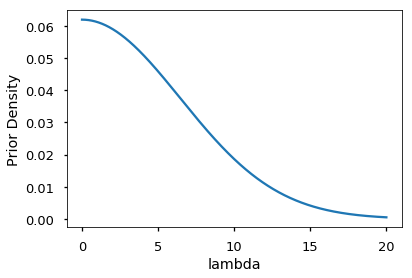

In [54]:
lmda = np.linspace(0, 20, num=int(20/1e-4))
p_lmda = stats.norm(loc=0, scale=prior_sd).pdf(lmda)
plt.plot(lmda, p_lmda)
plt.xlabel("lambda"); plt.ylabel("Prior Density");

In [55]:
# get prior predictive distribution
with pm.Model() as model:
    lmda = pm.HalfNormal("lmda", sd=prior_sd)
    y = pm.Poisson("y", mu=lmda, shape=(n_sensors,), observed=None)
    
with model:
    trace = pm.sample_prior_predictive(n_samples)
    
simulated_lmdas = trace["lmda"]
simulated_ys = trace["y"]

In [56]:
trace.shape

AttributeError: 'dict' object has no attribute 'shape'

  0%|          | 0/50 [00:00<?, ?it/s]/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
100%|██████████| 50/50 [00:00<00:00, 64.51it/s]


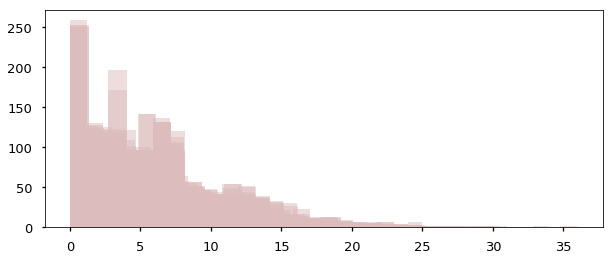

In [45]:
plt.subplots(figsize=(10,4))
for i in tqdm(range(50)):
    sns.distplot(simulated_ys[i,:], hist=True, kde=False, color=c_light,
                hist_kws={'alpha':0.5})

In [51]:
# Fit the model to simulated data
with pm.Model() as model:
    lmda = pm.HalfNormal("lmda", sd=prior_sd)
    y = pm.Poisson("y", mu=lmda, shape=(n_sensors,), observed=simulated_ys[-1,:])
    
    trace = pm.sample(n_samples, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lmda]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:02<00:00, 5037.93draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1fcf3be0>,
      dtype=object)

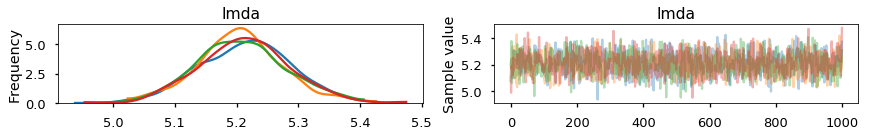

In [52]:
pm.traceplot(trace)